In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
from math import ceil
import random
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVR

import model_utility, color_utility, visuals_utility, data_utility

import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

### Data

In [2]:
original_df = pd.read_csv("https://projects.fivethirtyeight.com/nfl-api/nfl_elo.csv")
original_df

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,qb2_game_value,qb1_value_post,qb2_value_post,qbelo1_post,qbelo2_post,score1,score2,quality,importance,total_rating
0,1920-09-26,1920,0,NaN,RII,STP,1503.947000,1300.000000,0.824651,0.175349,...,NaN,NaN,NaN,NaN,NaN,48,0,NaN,NaN,NaN
1,1920-10-03,1920,0,NaN,AKR,WHE,1503.420000,1300.000000,0.824212,0.175788,...,NaN,NaN,NaN,NaN,NaN,43,0,NaN,NaN,NaN
2,1920-10-03,1920,0,NaN,BFF,WBU,1478.004000,1300.000000,0.802000,0.198000,...,NaN,NaN,NaN,NaN,NaN,32,6,NaN,NaN,NaN
3,1920-10-03,1920,0,NaN,DAY,COL,1493.002000,1504.908000,0.575819,0.424181,...,NaN,NaN,NaN,NaN,NaN,14,0,NaN,NaN,NaN
4,1920-10-03,1920,0,NaN,RII,MUN,1516.108000,1478.004000,0.644171,0.355829,...,NaN,NaN,NaN,NaN,NaN,45,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2023-01-22,2022,0,d,BUF,CIN,1731.516093,1690.292481,0.648277,0.351723,...,303.726984,225.069808,230.466056,1675.570770,1690.152492,10,27,99.0,100.0,100.0
17375,2023-01-22,2022,0,d,SF,DAL,1708.971847,1640.135262,0.683613,0.316387,...,105.114287,109.133365,191.883277,1719.153115,1619.647034,19,12,98.0,100.0,99.0
17376,2023-01-29,2022,0,c,PHI,SF,1621.987292,1721.375447,0.450672,0.549328,...,56.917741,246.826740,103.911803,1645.507079,1693.213858,31,7,99.0,100.0,100.0
17377,2023-01-29,2022,0,c,KC,CIN,1735.804844,1729.668918,0.600966,0.399034,...,28.185998,280.177715,210.238050,1708.664922,1678.805820,23,20,100.0,100.0,100.0


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            17379 non-null  object 
 1   season          17379 non-null  int64  
 2   neutral         17379 non-null  int64  
 3   playoff         616 non-null    object 
 4   team1           17379 non-null  object 
 5   team2           17379 non-null  object 
 6   elo1_pre        17379 non-null  float64
 7   elo2_pre        17379 non-null  float64
 8   elo_prob1       17379 non-null  float64
 9   elo_prob2       17379 non-null  float64
 10  elo1_post       17379 non-null  float64
 11  elo2_post       17379 non-null  float64
 12  qbelo1_pre      15217 non-null  float64
 13  qbelo2_pre      15217 non-null  float64
 14  qb1             15217 non-null  object 
 15  qb2             15217 non-null  object 
 16  qb1_value_pre   15217 non-null  float64
 17  qb2_value_pre   15217 non-null 

In [4]:
original_df.columns

Index(['date', 'season', 'neutral', 'playoff', 'team1', 'team2', 'elo1_pre',
       'elo2_pre', 'elo_prob1', 'elo_prob2', 'elo1_post', 'elo2_post',
       'qbelo1_pre', 'qbelo2_pre', 'qb1', 'qb2', 'qb1_value_pre',
       'qb2_value_pre', 'qb1_adj', 'qb2_adj', 'qbelo_prob1', 'qbelo_prob2',
       'qb1_game_value', 'qb2_game_value', 'qb1_value_post', 'qb2_value_post',
       'qbelo1_post', 'qbelo2_post', 'score1', 'score2', 'quality',
       'importance', 'total_rating'],
      dtype='object')

In [5]:
# selecting only features that will be used for analysis and modeling
features = [ 'team1', 'team2', 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 
       'qbelo1_pre', 'qbelo2_pre', 'qbelo_prob1', 'qbelo_prob2', 'quality',
       'score1', 'score2']

In [6]:
df = original_df[features].copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15217 entries, 0 to 15216
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team1        15217 non-null  object 
 1   team2        15217 non-null  object 
 2   elo1_pre     15217 non-null  float64
 3   elo2_pre     15217 non-null  float64
 4   elo_prob1    15217 non-null  float64
 5   elo_prob2    15217 non-null  float64
 6   qbelo1_pre   15217 non-null  float64
 7   qbelo2_pre   15217 non-null  float64
 8   qbelo_prob1  15217 non-null  float64
 9   qbelo_prob2  15217 non-null  float64
 10  quality      15217 non-null  float64
 11  score1       15217 non-null  int64  
 12  score2       15217 non-null  int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
# deriving the target based on scores of the game
df['winner'] = np.where(df['score1'] > df['score2'], 0, 1)

# exporting the final dataset with features - including scores and teams as 
# references even though it will not be used in modeling.
df.to_csv("../data/final_nfl_elo.csv")

### Modeling

#### Split data for training and testing

In [9]:
# split the X and y
X_features = [ 'elo1_pre', 'elo2_pre', 'elo_prob1', 'elo_prob2', 
       'qbelo1_pre', 'qbelo2_pre', 'qbelo_prob1', 'qbelo_prob2', 'quality']

target = 'winner'

In [10]:
X = df[X_features].copy()
y = df[target]

In [11]:
# check the distribution of y, which in this case is pretty good with 
# 57 and 43 percent
print(y.value_counts())
print("\nTarget Percentage (0 vs 1)")
print((y.value_counts() / len(y)) * 100)

winner
0    8640
1    6577
Name: count, dtype: int64

Target Percentage (0 vs 1)
winner
0    56.778603
1    43.221397
Name: count, dtype: float64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (10651, 9)
X_test: (4566, 9)
y_train: (10651,)
y_test: (4566,)


#### Model Selection

In [13]:
# process with multiple models and see which has better accuracy
model_results = model_utility.process_models(model_utility.classification_models, X_train, X_test, y_train, y_test)

In [14]:
for m_name, m_data in model_results.items():
    print(f"{m_name} : accuracy_score : {m_data['accuracy_score']:.5f}")
    print(f"{m_name} : balanced_accuracy_score : {m_data['balanced_accuracy_score']:.5f}\n")

Logistic Regression : accuracy_score : 0.65966
Logistic Regression : balanced_accuracy_score : 0.63819

SVC : accuracy_score : 0.65834
SVC : balanced_accuracy_score : 0.62975

KNeighbors Classifier : accuracy_score : 0.62768
KNeighbors Classifier : balanced_accuracy_score : 0.61273

DecisionTree Classifier : accuracy_score : 0.57337
DecisionTree Classifier : balanced_accuracy_score : 0.56474

RandomForest Classifier : accuracy_score : 0.63491
RandomForest Classifier : balanced_accuracy_score : 0.61913



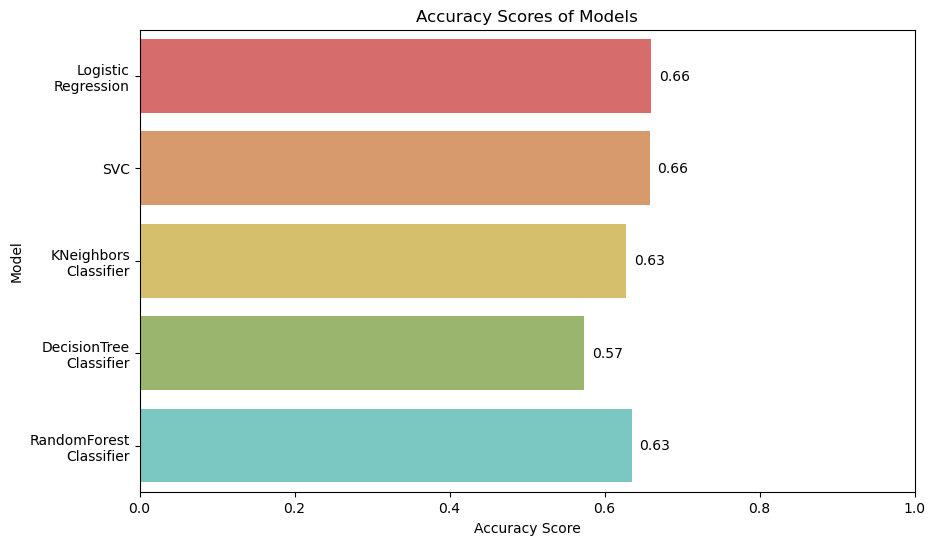

In [15]:
# visual representation of accuracy scores
visuals_utility.show_accuracy_scores({m_name:m_data['accuracy_score'] for m_name, m_data in model_results.items()})

In [21]:
l_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

l_model.fit(X_train, y_train)

t_score = l_model.score(X_train, y_train)
y_predict = l_model.predict(X_test)

a_score = accuracy_score(y_test, y_predict)

bal_a_score = balanced_accuracy_score(y_test, y_predict)

conf_matrix = confusion_matrix(y_test, y_predict)

class_report = classification_report(y_test, y_predict)

print(f"training_score : {t_score:.5f}\n")
print(f"accuracy_score : {a_score:.5f}\n")
print(f"balanced_accuracy_score : {bal_a_score:.5f}\n")

print(f"classification_report : \n {class_report}\n")

training_score : 0.65158

accuracy_score : 0.66623

balanced_accuracy_score : 0.64569

classification_report : 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      2637
           1       0.63      0.51      0.57      1929

    accuracy                           0.67      4566
   macro avg       0.66      0.65      0.65      4566
weighted avg       0.66      0.67      0.66      4566




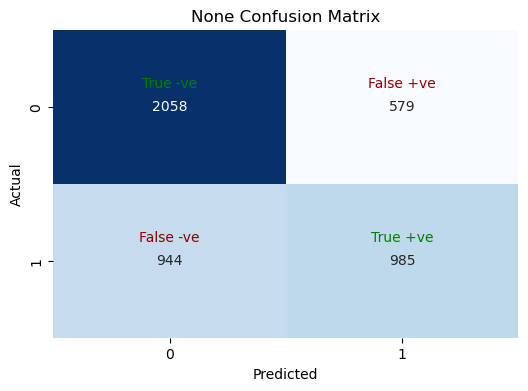

In [20]:
visuals_utility.single_binary_confusion_matrix(conf_matrix)

In [35]:
svc_model = SVC(kernel='linear', gamma='auto', random_state=42, 
                decision_function_shape='ovo')

svc_model.fit(X_train, y_train)

t_score = svc_model.score(X_train, y_train)
y_predict = svc_model.predict(X_test)

a_score = accuracy_score(y_test, y_predict)

bal_a_score = balanced_accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
class_report = classification_report(y_test, y_predict)

print(f"training_score : {t_score:.5f}\n")
print(f"accuracy_score : {a_score:.5f}\n")
print(f"balanced_accuracy_score : {bal_a_score:.5f}\n")

print(f"classification_report : \n {class_report}\n")

training_score : 0.65102

accuracy_score : 0.66251

balanced_accuracy_score : 0.64135

classification_report : 
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      2637
           1       0.62      0.50      0.56      1929

    accuracy                           0.66      4566
   macro avg       0.65      0.64      0.64      4566
weighted avg       0.66      0.66      0.66      4566


